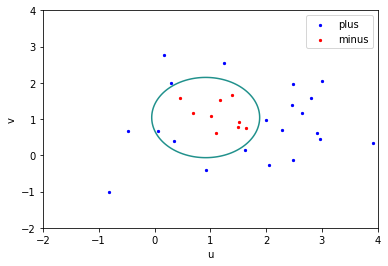

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.seterr(invalid='ignore', over='ignore')  
# suppress warning caused by division by inf

N =30
np.random.seed(0)
X = np.random.randn(2,N)
y = np.sign( X[0,:]**2+ X[1,:]**2 -0.7)
theta = 0.5
c, s = np.cos(theta), np.sin( theta )
X = np.array ([[c,-s],[s,c]])@X
X = X + np.array([[1] ,[1]])

def phi(X):
    temp = np.ones( (5, X.shape[1]))
    for idx in range(X.shape[1]):
        temp[1, idx] = X[0, idx]
        temp[2, idx] = X[0, idx]**2
        temp[3, idx] = X[1, idx]
        temp[4, idx] = X[1, idx]**2
    return temp.T

class LR():
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.N = X.shape[0]
        self.p = X.shape[1]
        self.w = np.zeros(self.p)
        self.learning_rate = 0.01

    def loss(self):
        temp = np.mean(np.log(1 + np.exp(-self.Y*(self.X@self.w))))
        return temp

    def train(self):
        idx = np.random.randint(self.N)
        self.w -= self.learning_rate * 
        ( (np.exp(-self.Y[idx]*(self.X[idx,:]@self.w)))
         /(1 + np.exp(-self.Y[idx]*(self.X[idx,:]@self.w))) ) 
        * (-self.Y[idx]*self.X[idx,:])


epochs = 10000

model = LR(phi(X), y)
loss_list = []

for epoch in range(epochs):
    model.train()
    loss_list.append(model.loss())

xx = np.linspace(-4, 4, 1024)
yy = np.linspace(-4, 4, 1024)
xx, yy = np.meshgrid(xx, yy)
Z = model.w[0] + ( model.w[1]*xx + model.w[2]* (xx**2)) 
+ ( model.w[3]*yy + model.w[4]*(yy**2))

plus_mask, minus_mask = [], []
for idx in range(len(y)) :
    if y[idx] > 0 :
        plus_mask.append(idx)
    else :
        minus_mask.append(idx)

plt.scatter(X[0,plus_mask], X[1,plus_mask], color = 'b', 
            s=5, label = 'plus')
plt.scatter(X[0,minus_mask], X[1,minus_mask], color = 'r', 
            s=5, label = 'minus')

plt.contour(xx, yy, Z, 0)
plt.xlim((-2,4))
plt.ylim((-2,4))
plt.xlabel("u")
plt.ylabel("v")
plt.legend()
plt.show()

